Ray-traced images
===

Here, I simulated the hight speed camera equiped with PHiX using raysect, and considered the reflected light effect by comparing a non-reflected image with normal one.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 13

Set file pathes and show the information about ray-tracing conditions.

In [2]:
# path to folder storing ray-traced data
w_reflection = "../data/synthetic_data/2020_07_25_01_51_55"
wo_reflection = "../data/synthetic_data/2020_07_24_20_39_22_wo_ref/"

# header information
with open(os.path.join(w_reflection, "result.txt"), "r") as f:
    print("With the effect of reflected light:\n")
    print(f.read())

with open(os.path.join(wo_reflection, "result.txt"), "r") as f:
    print("Without the effect of reflected light:\n")
    print(f.read())


With the effect of reflected light:

--------------------------------------------------------------------------------
camera name              : PHiX fast-visible camera (calibration: /gs/hs1/tga-fusion/18M58696/python/cherab_phix/output/shot_17393/calibration)
camera pixels            : (256, 512)
camera per pixel samples : 5
camera lens samples      : 10
camera pixel samples     : 50
camera spectral bins     : 50
camera wavelength range  : 655.6, 656.8
primitives material      : <class 'cherab.phix.machine.material.roughmetal.RoughSUS316L'>
--------------------------------------------------------------------------------

Without the effect of reflected light:

--------------------------------------------------------------------------------
camera name              : PHiX fast-visible camera (calibration: /gs/hs1/tga-fusion/18M58696/python/cherab_phix/output/shot_17393/calibration)
camera pixels            : (256, 512)
camera per pixel samples : 5
camera lens samples      : 10
camera 

show the typcal ray-traced image with reflection.

In [3]:
# Load ray-traced images
power_wo = np.load(os.path.join(wo_reflection, "Power.npy"))
power_total = np.load(os.path.join(w_reflection, "Power.npy"))
power_ref = power_total - power_wo
A_1px = (20e-6)**2  # Area of 1 pixel

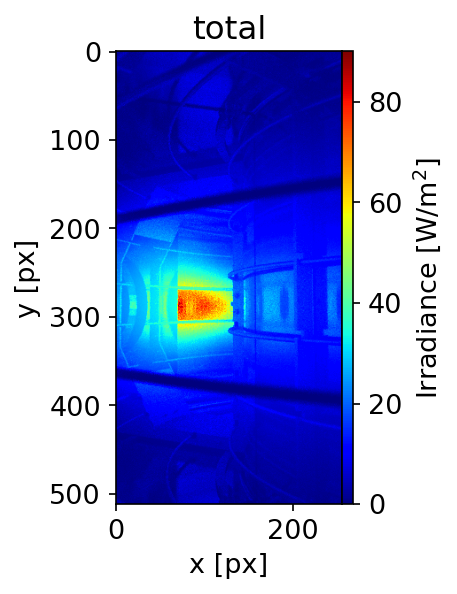

In [4]:
fig = plt.figure()
vmax = power_total.max() / A_1px
vmin = 0.0
grid = ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.02, label_mode="L", cbar_mode="single", cbar_pad=0)
im1 = grid[0].imshow(np.transpose(power_total) / A_1px, cmap="jet", vmax=vmax, vmin=vmin)
grid[0].set_xlabel("x [px]")
grid[0].set_ylabel("y [px]")
grid[0].set_title("total")
cbar1 = plt.colorbar(im1, grid.cbar_axes[0])
cbar1.set_label("Irradiance [W/m$^2$]")

Compare with to w/o reflection light by subtracting without reflection irradiance from total Irradiance.
---

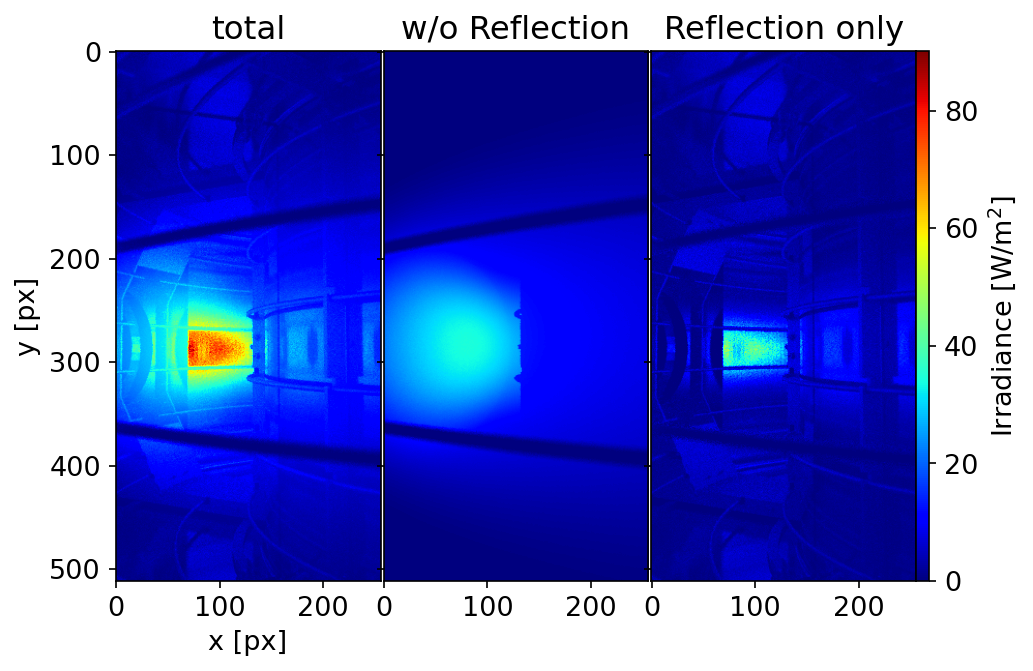

In [5]:
fig = plt.figure(figsize=(7, 100))
vmax = power_total.max() / A_1px
vmin = 0.0
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.02, label_mode="L", cbar_mode="single", cbar_pad=0)
im1 = grid[0].imshow(np.transpose(power_total) / A_1px, cmap="jet", vmax=vmax, vmin=vmin)
im2 = grid[1].imshow(np.transpose(power_wo) / A_1px, cmap="jet", vmax=vmax, vmin=vmin)
im3 = grid[2].imshow(np.transpose(power_ref) / A_1px, cmap="jet", vmax=vmax, vmin=vmin)
grid[0].set_xlabel("x [px]")
grid[0].set_ylabel("y [px]")
grid[0].set_title("total")
grid[1].set_title("w/o Reflection")
grid[2].set_title("Reflection only")
cbar1 = plt.colorbar(im1, grid.cbar_axes[0])
cbar1.set_label("Irradiance [W/m$^2$]")

Let's compare values which is retrieved by slicing the above images either at cetain x or y line.
The slicing points is corresponding to the pixel having the maximum value.

In [6]:
max_point = np.unravel_index(np.argmax(power_total), power_total.shape)

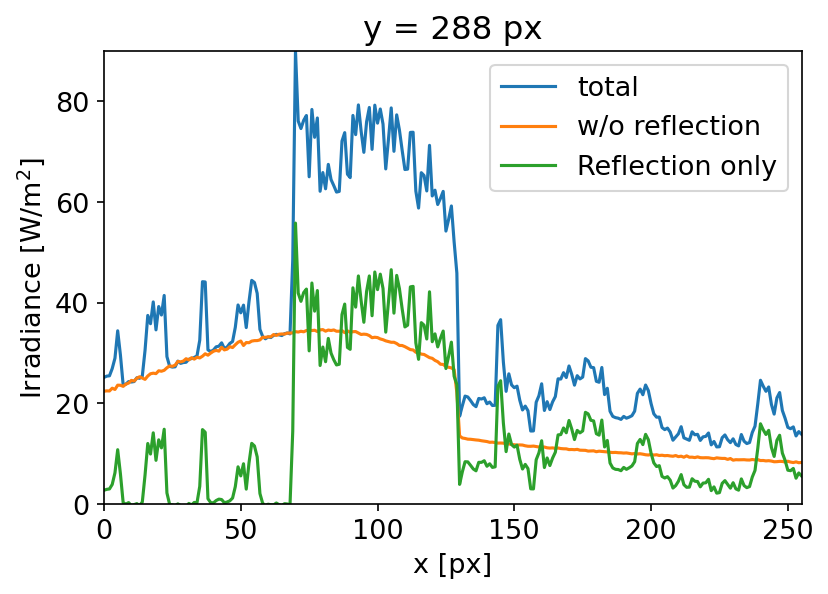

In [7]:
fig, ax = plt.subplots()
ypx = max_point[1] + 1
# ypx = 256
ax.plot(power_total[:, ypx-1] / A_1px, label="total")
ax.plot(power_wo[:, ypx-1] / A_1px, label="w/o reflection")
ax.plot(power_ref[:, ypx-1] / A_1px, label="Reflection only")
ax.legend();
ax.set_ylabel("Irradiance [W/m$^2$]")
ax.set_xlabel("x [px]")
ax.set_title(f"y = {ypx} px")
# ax.set_ylim(0, 40)
ax.set_xlim(0, power_total.shape[0]-1);
ax.set_ylim(0, 90);
# fig.set_size_inches(6,5)

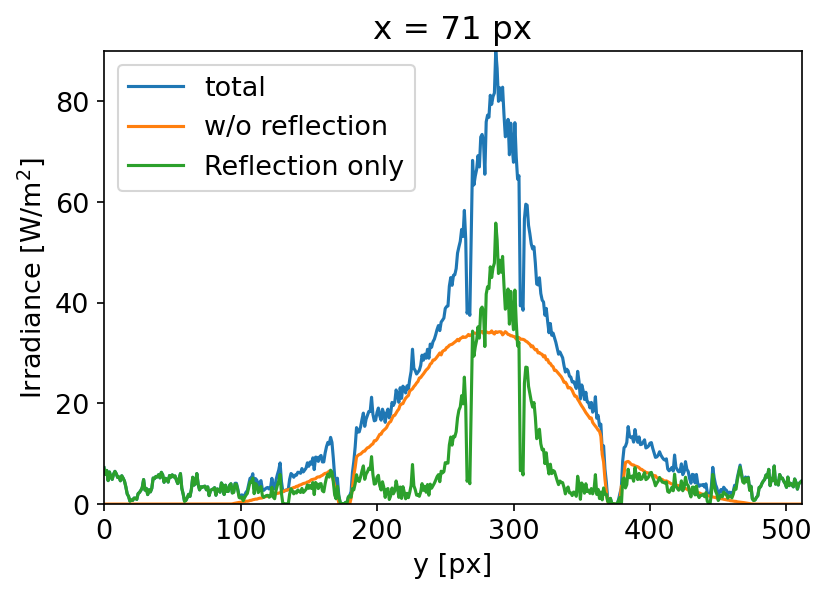

In [8]:
fig, ax = plt.subplots()
xpx = max_point[0] + 1
ax.plot(power_total[xpx-1, :] / A_1px, label="total")
ax.plot(power_wo[xpx-1, :] / A_1px, label="w/o reflection")
ax.plot(power_ref[xpx-1, :] / A_1px, label="Reflection only")
ax.legend();
ax.set_ylabel("Irradiance [W/m$^2$]")
ax.set_xlabel("y [px]")
ax.set_title(f"x = {xpx} px")
# ax.set_ylim(0, 40)
ax.set_xlim(0, power_total.shape[1]-1);
ax.set_ylim(0, 90);
# fig.set_size_inches(6,5)